# PDP 01

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

In this notebook, we recreate the XOR problem for perceptrons and demonstrate that deeper neural networks can overcome the challenge. This notebook uses homebrew neural network code written by Chih-Ling Hsu [[1]](https://chih-ling-hsu.github.io/2017/08/30/NN-XOR)[[2]](https://chih-ling-hsu.github.io/2018/08/19/NN-XOR). The original demonstrations also provide a description of the backpropagation algorithm for all inclined to see it presented a second way.

## Section 1: The XOR Problem

The XOR (exclusive or) problem is a classic problem in neural network theory. Specifically, the problem is how to construct a neural network to compute the exclusive or logical function. An XOR function should return a True value if the two inputs are not equal and a False value if they are equal. All possible inputs and predicted outputs are shown in the table below.

| Input 1 | Input 2 | Ouput |
|---------|---------|-------|
| 0       | 0       | 0     |
| 1       | 0       | 1     |
| 0       | 1       | 1     |
| 1       | 1       | 0     |

It is easy to create these inputs in Python.

In [2]:
## Define input data.
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

## Define corresponding outputs.
y = np.array([0, 1, 1, 0])

### Neural Network w/ No Hidden Layer

In this first step, let us demonstrate that a neural network with no hidden layer (i.e. a perceptron) cannot solve the XOR problem as shown by Minsky.

In [3]:
from pdp import NeuralNetwork

## Define network architecture.
# Input layer:  2 nodes
# Output layer: 1 node
net_arch = [2,1]

Fit the network to the data.

In [4]:
## Initialize network.
nn = NeuralNetwork(net_arch, activation='tanh', seed=47404)

## We use an overkill number of training epochs.
training = np.repeat(100, 100000 // 100)

## Train network.
weights = []
for epochs in training:
    nn.fit(X, y, epochs=epochs, alpha=1e-2)
    weights.append( nn.weights )

## Show predictions.
y_pred = nn.predict(X)
for a, b, c in zip(X, y, y_pred):
    print("Input: %s \t Truth: %s \t Predicted: %0.3f" %(a, b, c))

Input: [0 0] 	 Truth: 0 	 Predicted: 0.503
Input: [0 1] 	 Truth: 1 	 Predicted: 0.494
Input: [1 0] 	 Truth: 1 	 Predicted: 0.509
Input: [1 1] 	 Truth: 0 	 Predicted: 0.501


To get a better sense of what the network is doing, we can plot the decision boundaries that the neural network has learned for the training data.

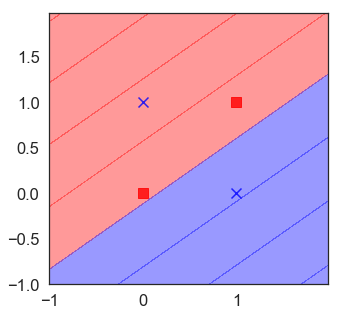

In [5]:
nn.plot_decision_regions(X, y);

### Neural Network w/ One Hidden Layer

Now let's show that a neural network with one hidden layer can in fact solve the XOR problem.

In [6]:
from pdp import NeuralNetwork

## Define network architecture.
# Input layer:  2 nodes
# Hidden layer: 2 nodes
# Output layer: 1 node
net_arch = [2,2,1]

Fit the network to the data.

In [7]:
## Initialize network.
nn = NeuralNetwork(net_arch, activation='tanh', seed=47404)

## We use an overkill number of training epochs.
training = np.repeat(100, 100000 // 100)

## Train network.
weights = []
for epochs in training:
    nn.fit(X, y, epochs=epochs, alpha=1e-2)
    weights.append( nn.weights[0].copy() )

## Show predictions.
y_pred = nn.predict(X)
for a, b, c in zip(X, y, y_pred):
    print("Input: %s \t Truth: %s \t Predicted: %0.3f" %(a, b, c))

Input: [0 0] 	 Truth: 0 	 Predicted: 0.001
Input: [0 1] 	 Truth: 1 	 Predicted: 0.995
Input: [1 0] 	 Truth: 1 	 Predicted: 0.995
Input: [1 1] 	 Truth: 0 	 Predicted: 0.001


Success! To get a better sense of what the network is doing, we can plot the decision boundaries that the neural network has learned for the training data. It's apparent the network has successfully learned the XOR problem.

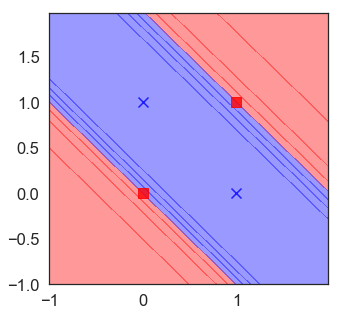

In [8]:
nn.plot_decision_regions(X, y);

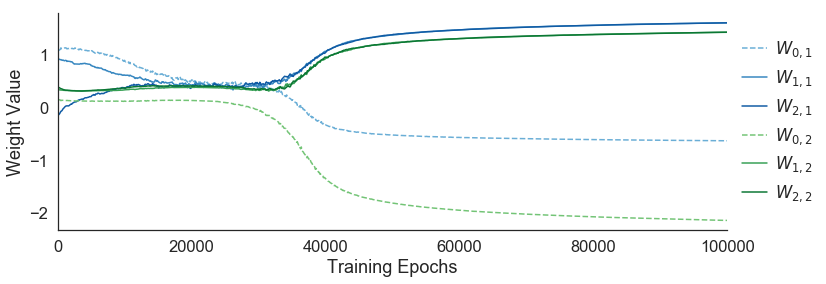

In [9]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))
weights = np.array(weights)

## Define colors.
blues = sns.color_palette('Blues', n_colors=5).as_hex()[-3:]
greens = sns.color_palette('Greens', n_colors=5).as_hex()[-3:]

## Plot.
ax.plot(np.cumsum(training), weights[:,0,0], linestyle='--', color=blues[0], label=r'$W_{0,1}$')
ax.plot(np.cumsum(training), weights[:,1,0], color=blues[1], label=r'$W_{1,1}$')
ax.plot(np.cumsum(training), weights[:,2,0], color=blues[2], label=r'$W_{2,1}$')
ax.plot(np.cumsum(training), weights[:,0,1], linestyle='--', color=greens[0], label=r'$W_{0,2}$')
ax.plot(np.cumsum(training), weights[:,1,1], color=greens[1], label=r'$W_{1,2}$')
ax.plot(np.cumsum(training), weights[:,2,1], color=greens[2], label=r'$W_{2,2}$')

## Add details.
ax.set(xlim=(0, np.cumsum(training).max()), xlabel='Training Epochs', ylabel='Weight Value')
ax.legend(loc=7, bbox_to_anchor=(1.15,0.5), frameon=False, handlelength=1.5, handletextpad=0.5)
sns.despine()

## Section 2: Solving the XOR Problem with Scikit-Learn
The `scikit-learn` package offers a robust [Multi-layer Perceptron](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) function. Though it cannot handle large-scale datasets (e.g. it does not offer GPU support), it is a nice tool for moderately sized datasets.

In [ ]:
from sklearn.neural_network import MLPClassifier
MLPClassifier?

Without the need for custom code, we can similarly use the `MLPClassifier` to solve the XOR problem. First, let's initialize the network.

In [11]:
nn = MLPClassifier((2,), solver='lbfgs', activation='tanh', alpha=1e-3, 
                   learning_rate='constant', learning_rate_init=1e-3, 
                   momentum=0, random_state=47404)

Now, let's train the network and show its predictions.

In [12]:
## Train the network on the data.
fit = nn.fit(X, y)

## Show predictions.
y_pred = fit.predict(X)
for a, b, c in zip(X, y, y_pred):
    print("Input: %s \t Truth: %s \t Predicted: %0.3f" %(a, b, c))

Input: [0 0] 	 Truth: 0 	 Predicted: 0.000
Input: [0 1] 	 Truth: 1 	 Predicted: 1.000
Input: [1 0] 	 Truth: 1 	 Predicted: 1.000
Input: [1 1] 	 Truth: 0 	 Predicted: 0.000
